Mean Squared Error: 0.5558915986952437
R-squared: 0.5757877060324512


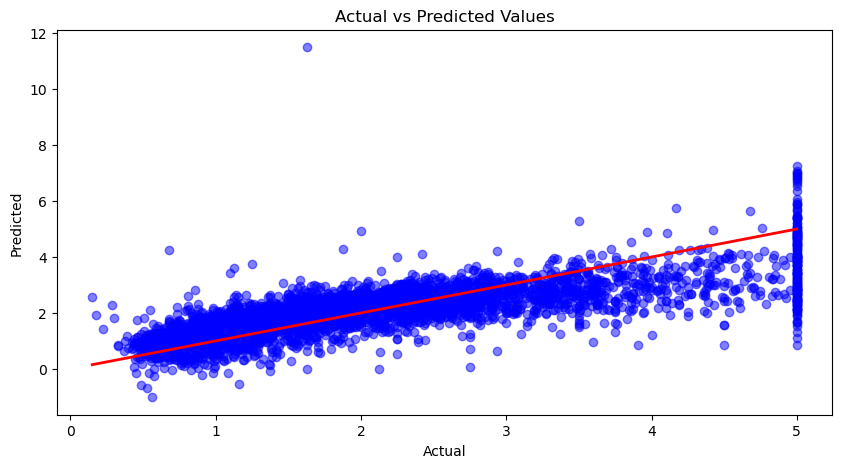

      Feature       VIF
0      MedInc  2.539815
1    HouseAge  1.237337
2    AveRooms  7.917240
3   AveBedrms  6.609200
4  Population  1.134824
5    AveOccup  1.009733
6    Latitude  9.206134
7   Longitude  8.875984
Polynomial Model - Mean Squared Error: 0.4643015016743905
Polynomial Model - R-squared: 0.6456819898336843


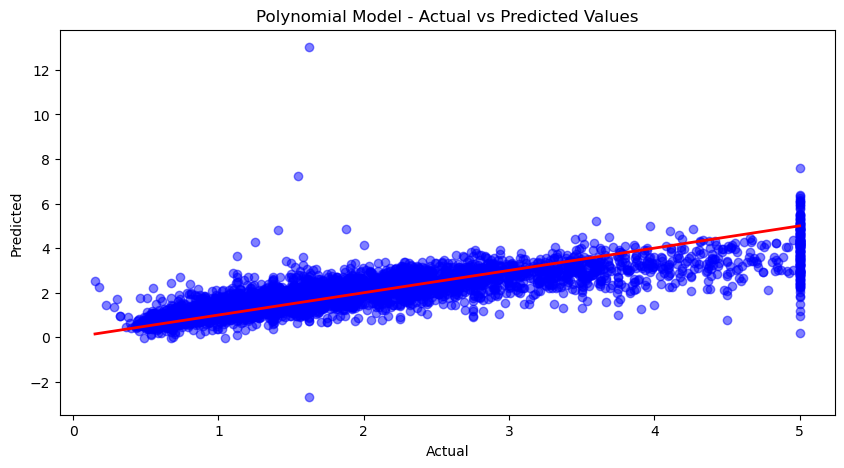

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

# Load the California housing dataset
california = fetch_california_housing()
df = pd.DataFrame(data=california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

# Split the data into training and testing sets
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Calculate Variance Inflation Factor (VIF)
# Add a constant term to the model for VIF calculation
X_train_vif = sm.add_constant(X_train)
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X_train_vif.values, i) for i in range(1, X_train_vif.shape[1])]
print(vif)

# Polynomial regression (optional)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
y_pred_poly = model_poly.predict(poly.transform(X_test))

# Evaluate the polynomial model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f"Polynomial Model - Mean Squared Error: {mse_poly}")
print(f"Polynomial Model - R-squared: {r2_poly}")

# Plot the actual vs predicted values for the polynomial model
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_poly, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Polynomial Model - Actual vs Predicted Values')
plt.show()


**1.Perform a linear regression to predict the median value of owner-occupied homes (MEDV).**


In [3]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**2.Calculate the coefficients of the regression model.**


In [4]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

            Coefficient
MedInc         0.448675
HouseAge       0.009724
AveRooms      -0.123323
AveBedrms      0.783145
Population    -0.000002
AveOccup      -0.003526
Latitude      -0.419792
Longitude     -0.433708


**3.Evaluate the model using R-squared.**


In [6]:
y_pred = model.predict(X_test)

**4.Evaluate the model using Mean Squared Error (MSE).**


In [7]:
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

R-squared: 0.5757877060324512


**5.Plot the residuals of the model.**


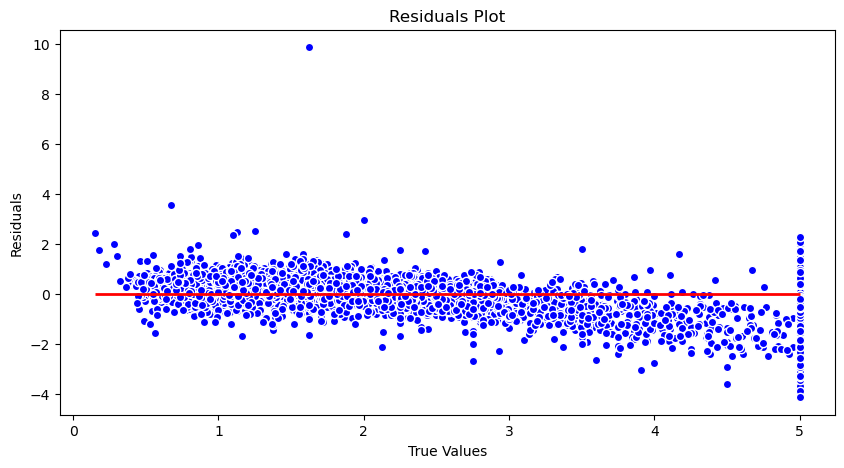

In [8]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred - y_test, c='blue', marker='o', edgecolor='white', label='Residuals')
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), color='red', lw=2)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

**6.Check for multicollinearity using VIF.**


In [9]:
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"] = X.columns
print(vif)

          VIF    Features
0   11.511140      MedInc
1    7.195917    HouseAge
2   45.993601    AveRooms
3   43.590314   AveBedrms
4    2.935745  Population
5    1.095243    AveOccup
6  559.874071    Latitude
7  633.711654   Longitude


**7.Perform polynomial regression for a feature.**


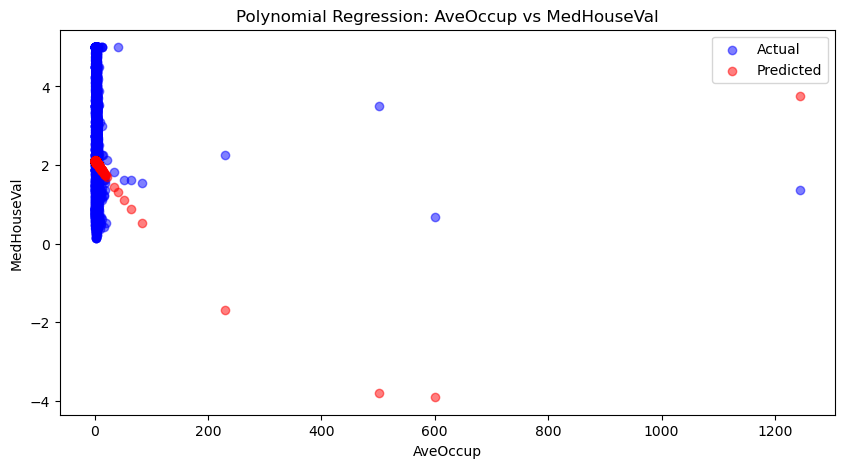

In [11]:

import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Load the California housing dataset
california = fetch_california_housing()
df = pd.DataFrame(data=california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

# Choose a feature, e.g., 'AveOccup' (Average Occupancy)
feature = 'AveOccup'

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df[[feature]])
poly_model = LinearRegression()
poly_model.fit(X_poly, df['MedHouseVal'])
y_poly_pred = poly_model.predict(X_poly)

# Plot the results
plt.figure(figsize=(10, 5))
plt.scatter(df[feature], df['MedHouseVal'], color='blue', alpha=0.5, label='Actual')
plt.scatter(df[feature], y_poly_pred, color='red', alpha=0.5, label='Predicted')
plt.xlabel(feature)
plt.ylabel('MedHouseVal')
plt.title(f'Polynomial Regression: {feature} vs MedHouseVal')
plt.legend()
plt.show()


**8.Compare linear and polynomial regression models.**

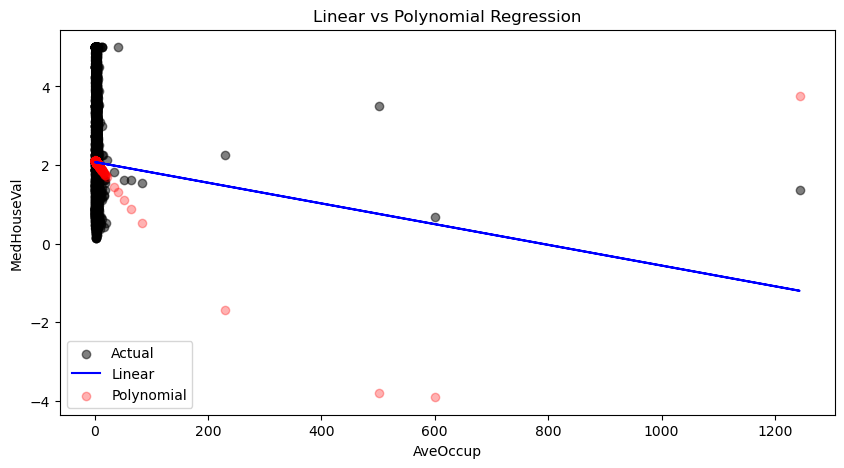

In [13]:

import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Load the California housing dataset
california = fetch_california_housing()
df = pd.DataFrame(data=california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

# Define the feature and target
feature = 'AveOccup'
target = 'MedHouseVal'

# Prepare the data
X = df[[feature]]
y = df[target]

# Linear regression
linear_model = LinearRegression()
linear_model.fit(X, y)
y_linear_pred = linear_model.predict(X)

# Polynomial regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_poly_pred = poly_model.predict(X_poly)

# Plot the results
plt.figure(figsize=(10, 5))
plt.scatter(X[feature], y, color='black', alpha=0.5, label='Actual')
plt.plot(X[feature], y_linear_pred, color='blue', label='Linear')
plt.scatter(X[feature], y_poly_pred, color='red', alpha=0.3, label='Polynomial')
plt.xlabel(feature)
plt.ylabel(target)
plt.title('Linear vs Polynomial Regression')
plt.legend()
plt.show()


**9.Perform multiple linear regression.**
